In [1]:
import pandas as pd
import pathlib, os, math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Experiment

### Items (m): 50
### Samples (s_samples): 20
### Noise runs (n_runs): 10
### DAG structure: 
#### X and Y have varyingly correlated parents
#### There 3 error nodes: $\epsilon_{X}\text{, }\epsilon_{Y}\text{, and }\epsilon_{Shared}$

$$X_\text{Noisy} = X + \text{shared_weight}*\epsilon_{X} + (1- \text{shared_weight})*\epsilon_\text{Shared}$$
$$Y_\text{Noisy} = Y + \text{shared_weight}*\epsilon_{Y} + (1- \text{shared_weight})*\epsilon_\text{Shared}$$

## Tested each sample for all 4 non-undefined metrics across values of shared_weight between 0 and 1, with error node standard deviations varying between 0 and 2.

In [2]:
base_repo_dir = pathlib.Path(os.getcwd()).parents[1]
pd.set_option('display.max_columns', 100)

In [3]:
metrics=["kendalls_tau",
         "num_retained_at_top_k",
         "change_in_percent_at_top_k",
         "prob_lower"]

exp_dfs=[]
for m in metrics:
    
    exp_dfs.append(pd.read_pickle(base_repo_dir/'out'/'distance_metrics'/'corr_errors'/m/'expected.pkl',
                         compression='gzip'))


shared_wgt_vals = sorted(list(set([float(x[0][4:]) for x in exp_dfs[0].index.values])))

In [4]:
col_linestyle_dict = {'exp_exp_noise':'solid', 
                      'exp_nonres0':'dotted', 'exp_nonres1':'dotted',
                      'exp_xres0':'dashed', 'exp_xres1':'dashed'}
col_marker_dict = {'exp_exp_noise':'.', 
                      'exp_nonres0':'v', 'exp_nonres1':'^',
                      'exp_xres0':'v', 'exp_xres1':'^'}

err_sds = sorted(list(set([float(x[1][3:]) for x in exp_dfs[0].index.values])))

#alpha_interval = (1-0.1)/(len(shared_wgt_vals)-1)
#alpha_dict = {shared_wgt_vals[i]:0.1+alpha_interval*i for i in range(len(shared_wgt_vals))}

color_pal = sns.color_palette("ch:s=-.2,r=.6", len(shared_wgt_vals))

color_dict = {shared_wgt_vals[i]:color_pal[i] for i in range(len(shared_wgt_vals))}


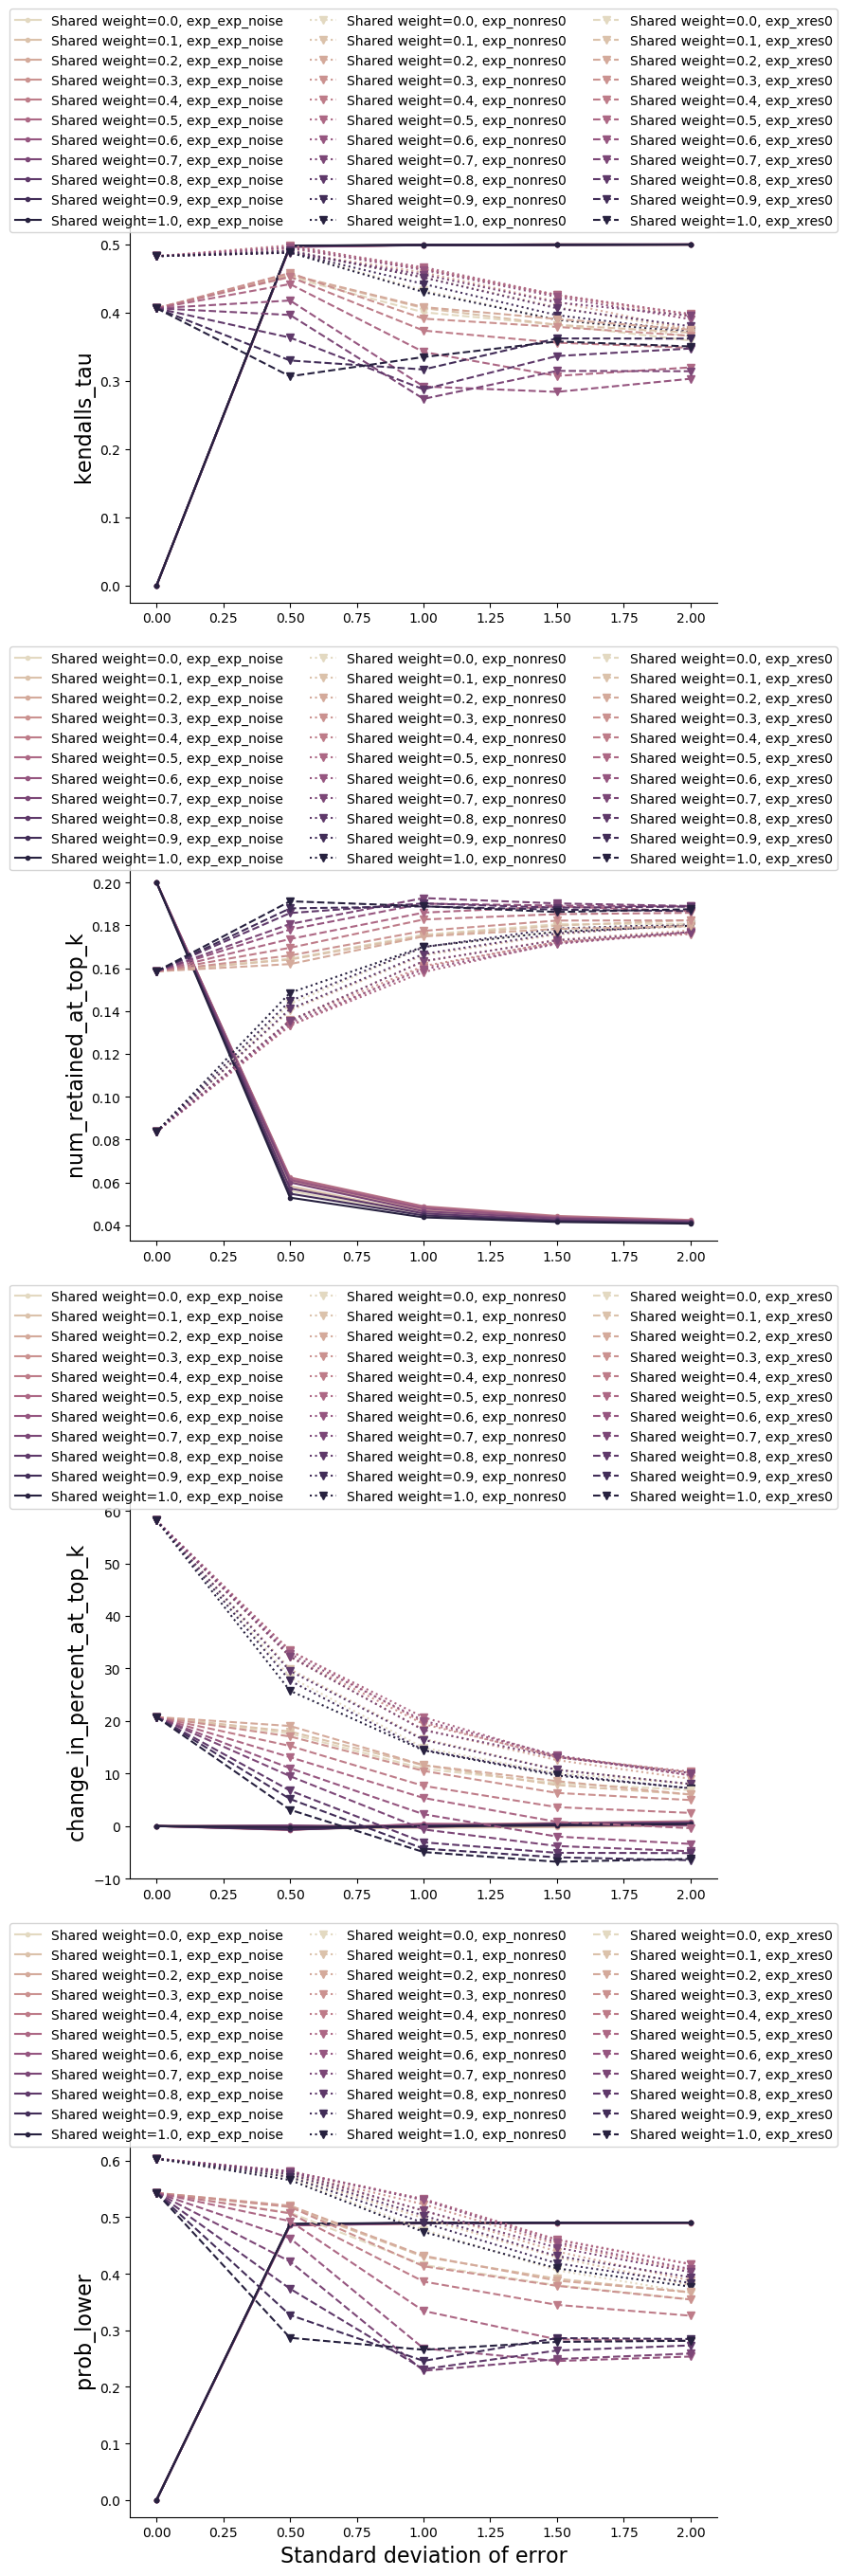

In [7]:
fig, ax = plt.subplots(len(metrics), 1, figsize=(8,8*len(metrics)), dpi=100)

for i in range(len(metrics)):
    
    # make spines invisible
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    for col in exp_dfs[0].columns:
        for shared_wgt_val in shared_wgt_vals:
            ax[i].plot(err_sds, exp_dfs[i].loc['wgt_{}'.format(shared_wgt_val)][col], 
                         color=color_dict[shared_wgt_val],
                         linestyle=col_linestyle_dict[col],
                         marker = col_marker_dict[col],
                         label='Shared weight={}, {}'.format(shared_wgt_val, col))
            
        ax[i].legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.6))

        ax[i].set_ylabel(metrics[i], size=16)

ax[len(metrics)-1].set_xlabel('Standard deviation of error', size=16)
fig.subplots_adjust(hspace=0.7)

plt.show()